# Single Coug Visualization

In [13]:
import rosbags_converter as rc
import pandas as pd
import matplotlib.pyplot as plt


### User Defined Variables

In [14]:
ROSBAGS_DIR = "~/so_apr_18_bags"
SAVES_DIR = "converted_bags"
MISSION_KEYWORDS = []

folder_name = "coug1"
ns = "/coug1"
beaconId = 1

In [15]:
# Convert Rosbags
vehicle_folder = SAVES_DIR+'/'+folder_name
dataframes = rc.load_dataframes(vehicle_folder, keywords=MISSION_KEYWORDS, verbose=True)
if len(dataframes)==0:
    print("converting rosbags")
    typestore = rc.generate_typestore("../../cougars-ros2/src")
    dataframes = rc.convert_rosbags(ROSBAGS_DIR, typestore, 
                                    keywords=MISSION_KEYWORDS,verbose=VERBOSE)
    rc.save_to_csv(dataframes, SAVES_DIR, verbose=VERBOSE)
    dataframes = rc.load_dataframes(vehicle_folder, keywords=MISSION_KEYWORDS)

Loading /home/claytonsmith/Documents/cougUV/CoUGARs/cougars-base-station/postprocessing/converted_bags/coug1/converted__-2025-04-18-14-29-36
Loading /home/claytonsmith/Documents/cougUV/CoUGARs/cougars-base-station/postprocessing/converted_bags/coug1/converted__so_5.0_multi-2025-04-18-15-55-38
Loading /home/claytonsmith/Documents/cougUV/CoUGARs/cougars-base-station/postprocessing/converted_bags/coug1/converted__so_5.5_multi-2025-04-18-16-42-57
Loading /home/claytonsmith/Documents/cougUV/CoUGARs/cougars-base-station/postprocessing/converted_bags/coug1/converted__SO_3.0_multi_cougs-2025-04-18-14-40-44
Loading /home/claytonsmith/Documents/cougUV/CoUGARs/cougars-base-station/postprocessing/converted_bags/coug1/converted__so_5.1_multi-2025-04-18-16-09-08
Loading /home/claytonsmith/Documents/cougUV/CoUGARs/cougars-base-station/postprocessing/converted_bags/coug1/converted__so_5.4_multi-2025-04-18-16-34-01
Loading /home/claytonsmith/Documents/cougUV/CoUGARs/cougars-base-station/postprocessing/

In [18]:
# display topics by rosbag
for path, topics in dataframes.items():
    print(f"{path}:\n\t{list(topics.keys())}")

converted__-2025-04-18-14-29-36:
	['/coug1/extended_fix', '/coug1/dvl/dr_global', '/coug1/modem_rec', '/coug1/controls/command', '/coug1/dvl/dead_reckoning', '/coug1/gps_odom', '/coug1/desired_heading', '/coug1/modem_status', '/coug1/modem_imu', '/coug1/leak/data', '/coug1/dvl/data', '/coug1/safety_status', '/coug1/controls/debug', '/coug1/fix', '/coug1/pressure/data', '/coug1/battery/data', '/coug1/depth_data', '/tf', '/coug1/dvl/position', '/coug1/kinematics/command', '/coug1/desired_speed', '/coug1/desired_depth', '/tf_static', '/coug1/dvl/velocity']
converted__so_5.0_multi-2025-04-18-15-55-38:
	['/coug1/extended_fix', '/coug1/dvl/dr_global', '/coug1/modem_rec', '/coug1/controls/command', '/coug1/dvl/dead_reckoning', '/coug1/gps_odom', '/coug1/desired_heading', '/coug1/modem_status', '/coug1/modem_imu', '/coug1/leak/data', '/coug1/dvl/data', '/coug1/safety_status', '/coug1/controls/debug', '/coug1/fix', '/coug1/pressure/data', '/coug1/battery/data', '/coug1/depth_data', '/tf', '/cou

converted__-2025-04-18-14-29-36


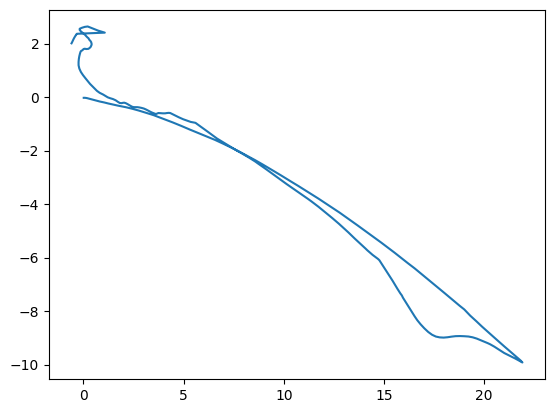

converted__so_5.0_multi-2025-04-18-15-55-38


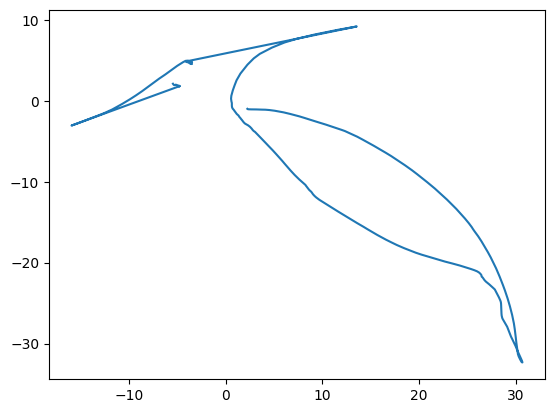

converted__so_5.5_multi-2025-04-18-16-42-57


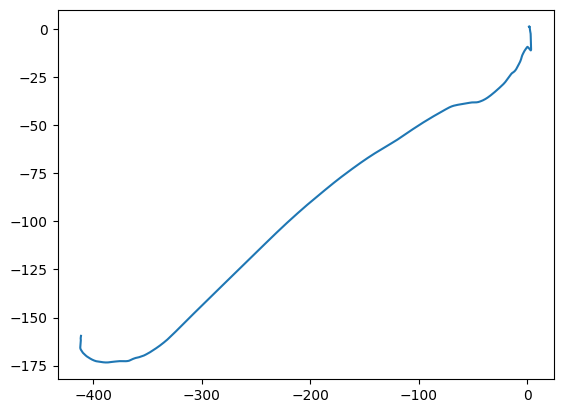

converted__SO_3.0_multi_cougs-2025-04-18-14-40-44


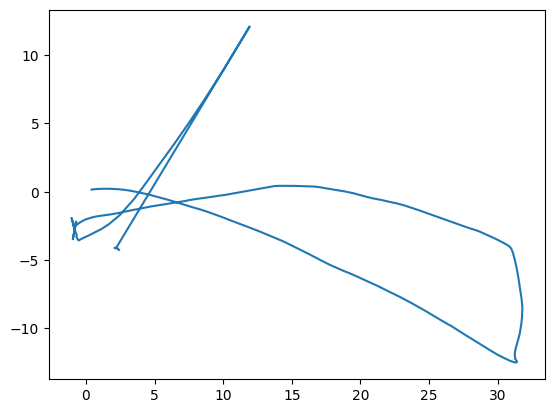

converted__so_5.1_multi-2025-04-18-16-09-08
converted__so_5.4_multi-2025-04-18-16-34-01


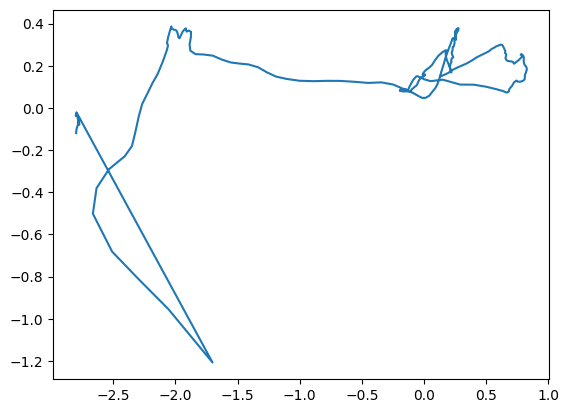

converted__so_4.0_multi-2025-04-18-15-04-05


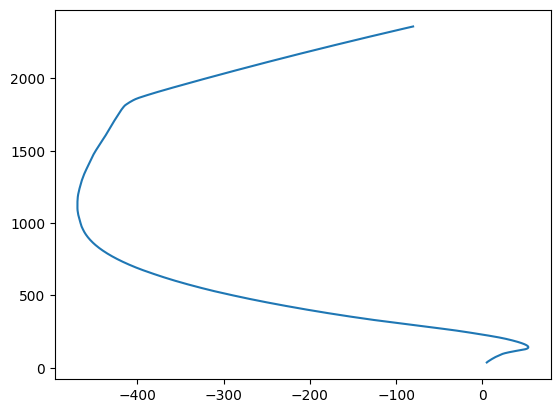

In [20]:
for mission, topic_dfs in dataframes.items():
    print(mission)
    if ns+"/dvl/position" in topic_dfs:
        dvl_df = topic_dfs[ns+"/dvl/position"]
        plt.plot(dvl_df["position.x"], dvl_df["position.y"])
        plt.show()

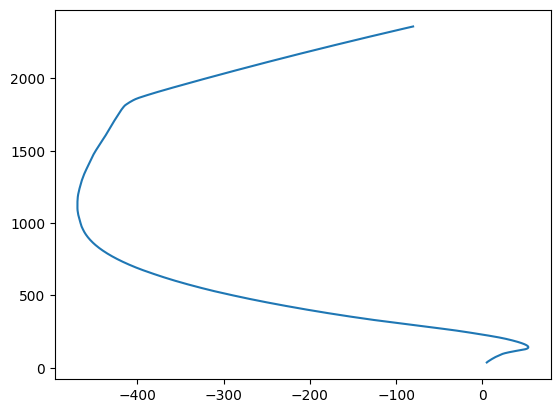